**IMPORTANT FIRST STEP:** Click "Copy to Drive" (above &#8593;) or go to **File > Save a Copy in Drive** so you'll have your own version to work on. This requires a Google login. If you want to start over from scratch, open the [original activity here](<INSERT HYPERLINK URL HERE).  

# Intro To Magnetic Field of a Current-Carrying Wire

In this activity you will learn to:  
- Use the PhyPhox app to measure magnetic field strength
- Experimentally determine the location of the magnetometer in your phone
- Map the magnetic field around a current carrying wire
- Address uncertainty in position and measurements

<hr/>

# B-Field Variation
How does your phone's compass know where it's pointing?

What does the magnetic field "look like" around a wire with a current flowing through it?

How are the following parameters related?
- Magnetic field (B) when current (I) (or voltage, V) is changed (Fixed distance)
- Magnetic field (B) and distance from wire (r) (fixed current) [Requires creativity and extra consistency]
- Magnetic field (B) and position along wire (x) (fixed current, radius) and background magnetic field


Extra: Look at statistical variation in your data with a [Holmes' t' analysis](https://docs.google.com/document/d/1cjAfYwbG4IrwirHMPnvo87ZYdPTXBAWQAny4b1eVclE/edit?usp=sharing) of data you collect.

Question: Why might Python be a useful tool for establishing relationships between the pairs of parameters?

Answer here (Double-click to edit):

<hr/>

# Part 1 - Locate and verify the location of your phone's magnetometer


**Instructions:**
1. Download and install the PhyPhox app on your phone.
2. Navigate to the magnetometer sensor in PhyPhox.
3. Using any number of lab implements at your station, locate and/or verify the location of your phone's magnetometer.

Question: How do you know that you have found the location of your phone's magnetometer? Use Claim, Evidence, and Reasoning format in your answer.

Answer:

<hr/>

# Part 2 - Investigate Magnetic Field around a current-carrying wire

Data Collection Guidelines:
1. Choose or be assigned a pair of parameters to investigate.
2.

##WORKING
Students should play around to determine a good range and then break that range down into workable increments.

Need uncertainty in your data points. How long should students collect magnetic field data? What is the standard deviation in a given data point? Can you use code to do this efficiently from a data set?
Importing Data:

IDEAS:
- Constant velocity buggy that carries phone/magnetometer
- Collect data with uniform strategy so that position can be reverse-engineered from grouping over time.



[How to import data with different file types](https://colab.research.google.com/drive/1u-gfLQXKsNnQqhajK_Udd5ahJ-Fzth8U)

In [ ]:
# This block of code is provided for you to import the necessary modules for this investigation.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# read in data files
magfieldINSIDE = pd.read_csv('https://raw.githubusercontent.com/paulkoziel/physics/main/Raw%20Data%20Inside.csv')
#magfieldINSIDE.head(5)


magfieldOUTSIDE = pd.read_csv('https://raw.githubusercontent.com/paulkoziel/physics/main/Raw%20Data%20Outside.csv')
#magfieldOUTSIDE.head(5)

magfieldINSIDE.shape

(8827, 5)

In [ ]:
# calculate a Holmes t' to compare the two samples

#meanINSIDEbycolumn = np.mean(magfieldINSIDE,axis=0)
#meanOUTSIDEbycolumn = np.mean(magfieldOUTSIDE,axis=0)

#absolutemeanINSIDE = meanINSIDEbycolumn["Absolute field (µT)"]
#absolutemeanOUTSIDE = meanOUTSIDEbycolumn["Absolute field (µT)"]

meanIN = np.mean(magfieldINSIDE["Absolute field (µT)"])
meanOUT = np.mean(magfieldOUTSIDE["Absolute field (µT)"])

stdevIN = np.std(magfieldINSIDE["Absolute field (µT)"])
stdevOUT = np.std(magfieldOUTSIDE["Absolute field (µT)"])

N_IN = len(magfieldINSIDE["Absolute field (µT)"])
N_OUT = len(magfieldOUTSIDE["Absolute field (µT)"])

uncIN = stdevIN / np.sqrt(N_IN)
uncOUT = stdevOUT / np.sqrt(N_OUT)
tprime = np.abs( (meanIN-meanOUT) / np.sqrt( (uncIN**2)+(uncOUT**2) ) )

print(tprime)

170.1975833916666


In [ ]:
#PLAYGROUND FOR EFFIENCY
#This code is an example for how you can use .describe() to get a bunch of statistical values for a data series then call that value by label.
a = magfieldINSIDE["Absolute field (µT)"].describe() #Need to use the .describe() INCLUDING PARENTHESE to get this.
meanINSIDE = a.loc['mean']
print(meanINSIDE)

51.96182111426759


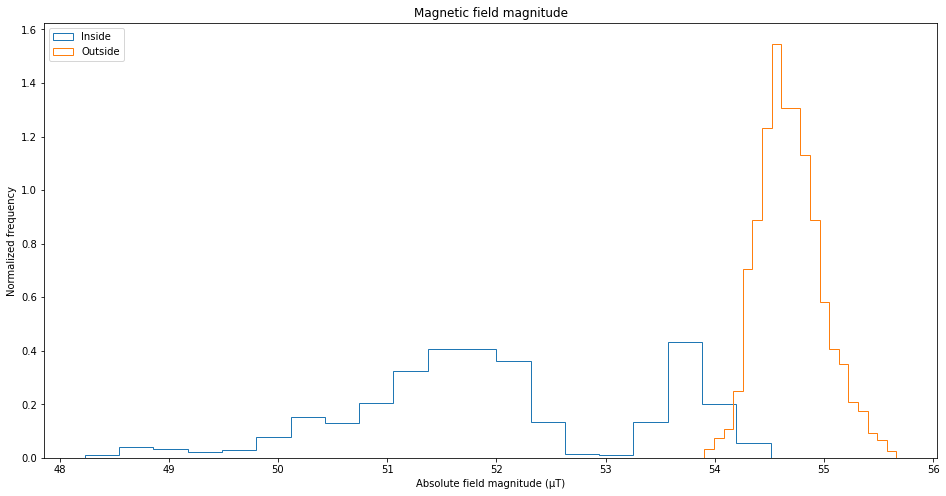

In [ ]:
# vizualize data to highlight relevant pattern
#fig, ax = plt.subplots(1, 1, figsize=(20,10))
#fig.subplots_adjust(hspace=0.5)

#plt.hist(magfieldINSIDE["Absolute field (µT)"],histtype="step",density=True)
#plt.hist(magfieldOUTSIDE["Absolute field (µT)"],histtype="step",density=True)
#plt.set(xlabel="Absolute field magnitude (µT)", ylabel="Normalized frequency", title="Magnetic field magnitude measurements")

fig,ax = plt.subplots(figsize=(16,8)) # Instantiate figure and axes object
ax.hist(magfieldINSIDE["Absolute field (µT)"], bins=20, label="Inside", histtype="step", density=True) # Plot normalized histogram of inside data
ax.hist(magfieldOUTSIDE["Absolute field (µT)"], bins=20, label="Outside", histtype="step", density=True) # Plot normalized of outside data
ax.set(xlabel="Absolute field magnitude (µT)", ylabel="Normalized frequency", title="Magnetic field magnitude")
plt.legend()
plt.show()

In [ ]:
# answer the research question in claim-evidence-reasoning style

matplotlib.axes._subplots.AxesSubplot


**CLAIM:** The magnitude of magnetic field in of my workspace is not the same as *not* the same as the magnetic field outside.

**EVIDENCE:** As seen in the plot above, the inside magnetic field magnitude varied over a wider range than the magnetic field outside. This is seen in the width of the histogram bars.

**REASONING:** The inside data (blue) showed a more uncertain peak (wider) around 51.75 microTeslas, while the outside data (orange) showed a more definite peak (taller) around 54.5 microTeslas. This may be because there are a lot of sources of magnetic field interference inside a room full of laptops and phones and there are much fewer sources of magnetic fields out on the... field outside.

# When you're ready ...
Check in with a workshop facilitator and give them a link to an interactive version of this notebook. Be sure it doesn't give edit privileges.